In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

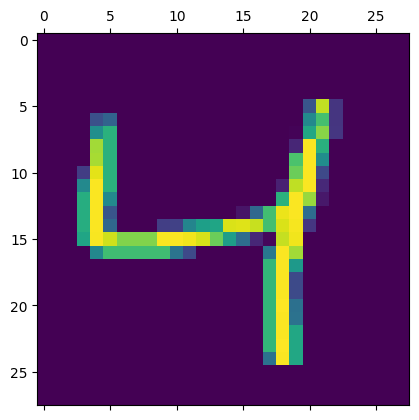

In [14]:
plt.matshow(X_train[2])

In [15]:
y_train[2]

np.uint8(4)

In [16]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [31]:
X_train = X_train / 255
X_test = X_test / 255

In [32]:
X_trained_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [33]:
X_trained_flattened.shape
X_test_flattened.shape

(10000, 784)

In [35]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_trained_flattened, y_train, epochs = 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.5842 - loss: 2.1885  
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.7065 - loss: 1.9776
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - accuracy: 0.7355 - loss: 1.7910
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 0.7616 - loss: 1.6272
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - accuracy: 0.7750 - loss: 1.4844
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - accuracy: 0.7891 - loss: 1.3606
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.7984 - loss: 1.2537
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.8072 - loss: 1.1618
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - accuracy: 0.8152 - loss: 1.0824
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 348us/step - accuracy: 0.8215 - loss: 1.0139
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step - accuracy: 0.8280 - loss: 0.9545
Epoch 

In [36]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.4939 - loss: 71.1982


[71.19820404052734, 0.49390000104904175]

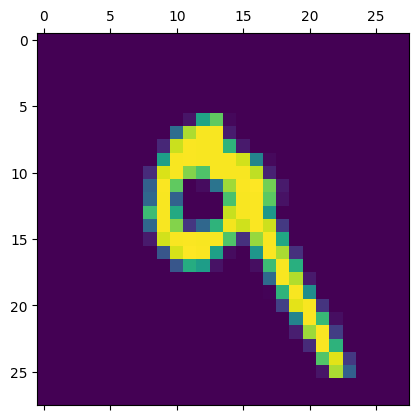

In [51]:
plt.matshow(X_test[7])

In [40]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step


In [50]:
np.argmax(y_predicted[7])

np.int64(8)

In [52]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(0), np.int64(1), np.int64(0), np.int64(4)]

In [53]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [54]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[974,   0,   2,   3,   0,   0,   1,   0,   0,   0],
       [  0, 970,  85,  58,   0,   3,   3,   0,  16,   0],
       [259,   0, 750,   4,   6,   0,   4,   4,   5,   0],
       [344,   0, 245, 408,   1,   0,   1,   7,   4,   0],
       [ 99,   0,  78,  52, 696,   0,  16,   2,  39,   0],
       [594,   1,  32, 122,   8,  79,   6,   2,  48,   0],
       [417,   2, 401,   6,   6,   3, 123,   0,   0,   0],
       [144,   5, 117, 143,  51,   1,   2, 554,  11,   0],
       [137,   1, 164, 254,   7,   8,  18,   9, 376,   0],
       [100,   1,  33, 122, 471,   6,   2,  95, 170,   9]], dtype=int32)>

In [66]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.5925 - loss: 1.2502
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.7851 - loss: 0.7073
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.8331 - loss: 0.5629
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8662 - loss: 0.4602
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.8870 - loss: 0.3934
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.8993 - loss: 0.3521
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.9061 - loss: 0.3252
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.9119 - loss: 0.3043
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.9163 - loss: 0.2868
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.9213 - loss: 0.2703
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9261 - loss: 0.2551  
Epoch 12

In [68]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.6302 - loss: 36.8631


[36.86306381225586, 0.6302000284194946]

In [72]:
y_predicted = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step


In [73]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [74]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    4,    1,    0,    0,    0,    1,    1],
       [   0, 1114,   10,    2,    0,    1,    0,    0,    8,    0],
       [  19,   37,  952,   14,    2,    0,    1,    2,    5,    0],
       [   0,    1,   47,  953,    1,    0,    0,    0,    8,    0],
       [  35,    3,   15,  175,  746,    1,    0,    0,    7,    0],
       [  32,    1,    2,  310,   44,  460,    2,    1,   40,    0],
       [ 555,    3,  147,    3,   26,   62,  159,    0,    3,    0],
       [   3,   13,  462,  486,    7,    0,    0,   54,    2,    1],
       [  11,    9,   22,   48,   10,   12,   22,    1,  839,    0],
       [  13,   15,    0,  354,  233,    0,    0,   86,  256,   52]],
      dtype=int32)>